## Miguel Ángel Villamil Huertas

## Tarea 5 Proyecto Análisis de Datos

## Proyecto: Titanic Dataset
## Pasos de Arbol decisión

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos

#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [1]:
#Cargar las liberias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# letura de datos en Python y lo cargamos en la  variables Datos
data = pd.read_csv("Titanic-Dataset.csv",index_col=0)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 11)

In [5]:
# Confirmacion de columnas
print(data.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# Descripción de los datos
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

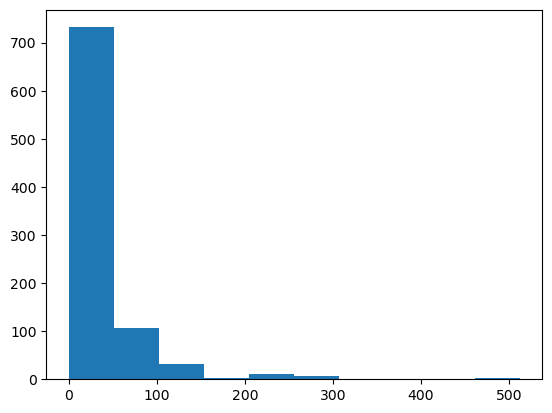

In [15]:
plt.hist(data.Fare)

<Axes: xlabel='SibSp', ylabel='Parch'>

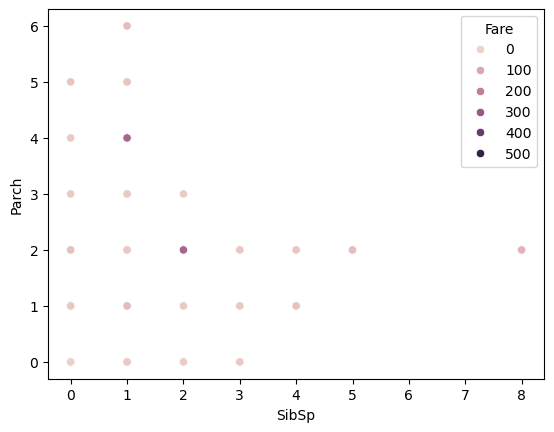

In [17]:
sns.scatterplot(x = "SibSp", y = "Parch", hue = "Fare", data = data)

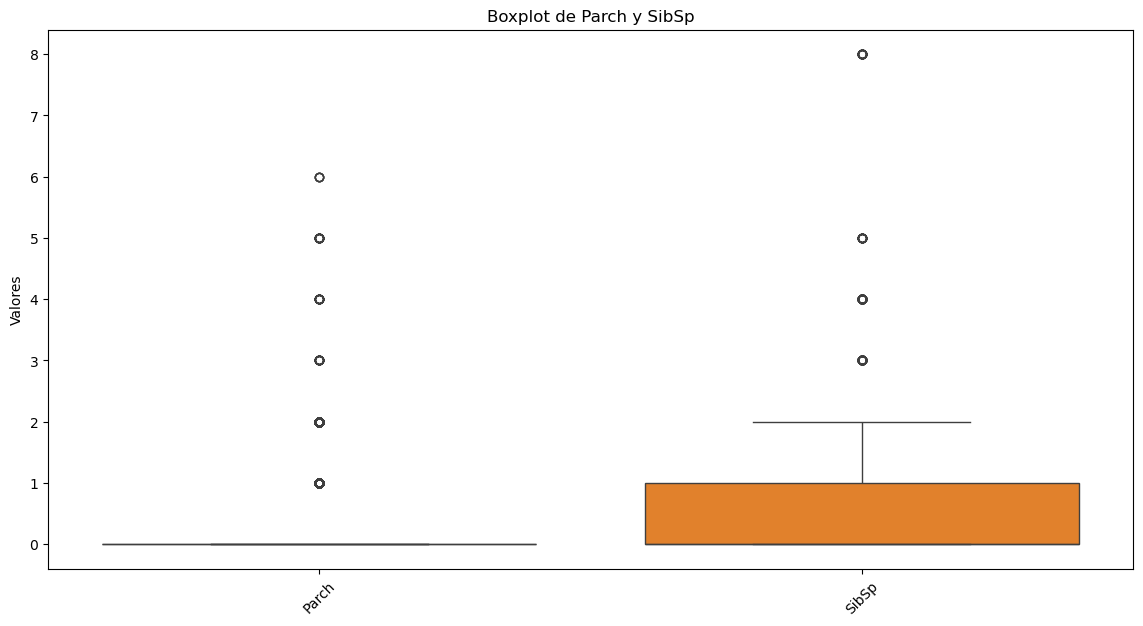

In [19]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data[['Parch', 'SibSp', 'Parch', 'SibSp']])
plt.xticks(rotation=45)
plt.title('Boxplot de Parch y SibSp')
plt.ylabel('Valores')
plt.show()

In [21]:
max_Parch = 10
min_Parch = 2
total_Parch = ((data['Parch'] <min_Parch) | (data['Parch'] > max_Parch)).sum()

max_Age = 20
min_Age = 8
total_Age = ((data['Age'] < min_Age) | (data['Age'] > min_Age)).sum()

print("Total registros dataset: {}".format(len(data)))
print("Total datos atipicos para la centidad Parch {}".format(total_Parch))
print("Total datos atipicos para el Age {}".format(total_Age))
print("")             

Total registros dataset: 891
Total datos atipicos para la centidad Parch 796
Total datos atipicos para el Age 710



In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [26]:
# Verificar valores faltantes
print(data.isnull().sum())

#Eliminar filas con vvallores faltantes

data.fillna(data.mean(), inplace=True)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


TypeError: unsupported operand type(s) for +: 'int' and 'str'

#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [35]:
predictors_col = ['Parch', 'SibSp']
target_col = ['Fare']

In [37]:
X = data[predictors_col]
y = data[target_col]

In [39]:
X

,Parch,SibSp
PassengerId,,
1,0,1
2,0,1
3,0,0
4,0,1
5,0,0
...,...,...
887,0,0
888,0,0
889,2,1


In [41]:
y

,Fare
PassengerId,
1,7.2500
2,71.2833
3,7.9250
4,53.1000
5,8.0500
...,...
887,13.0000
888,30.0000
889,23.4500


In [43]:
corr = X.corr()
corr

,Parch,SibSp
Parch,1.000000,0.414838
SibSp,0.414838,1.000000


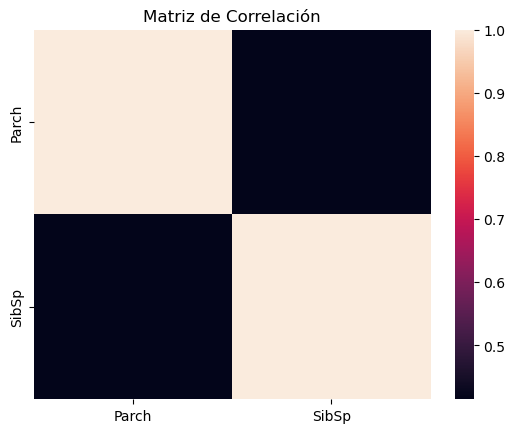

In [45]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

#### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [48]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [60]:
# Dividir los  datos en un conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 2) (268, 2) (623, 1) (268, 1)


In [62]:
X_train.head(2)

,Parch,SibSp
PassengerId,,
442,0,0
294,0,0


In [64]:
X_test.head(2)

,Parch,SibSp
PassengerId,,
497,0,1
844,0,0


#### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [69]:
tree_dt = DecisionTreeRegressor().fit(X_train, y_train)

[Text(0.33639705882352944, 0.9375, 'x[1] <= 0.5\nsquared_error = 2054.345\nsamples = 623\nvalue = 31.349'),
 Text(0.08823529411764706, 0.8125, 'x[0] <= 0.5\nsquared_error = 1814.638\nsamples = 432\nvalue = 24.483'),
 Text(0.058823529411764705, 0.6875, 'squared_error = 1568.062\nsamples = 379\nvalue = 21.383'),
 Text(0.11764705882352941, 0.6875, 'x[0] <= 2.5\nsquared_error = 3017.694\nsamples = 53\nvalue = 46.653'),
 Text(0.058823529411764705, 0.5625, 'x[0] <= 1.5\nsquared_error = 3175.555\nsamples = 50\nvalue = 47.69'),
 Text(0.029411764705882353, 0.4375, 'squared_error = 3523.857\nsamples = 27\nvalue = 48.984'),
 Text(0.08823529411764706, 0.4375, 'squared_error = 2762.406\nsamples = 23\nvalue = 46.171'),
 Text(0.17647058823529413, 0.5625, 'x[0] <= 4.0\nsquared_error = 69.586\nsamples = 3\nvalue = 29.357'),
 Text(0.14705882352941177, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 19.258'),
 Text(0.20588235294117646, 0.4375, 'squared_error = 27.892\nsamples = 2\nvalue = 34.406'),
 T

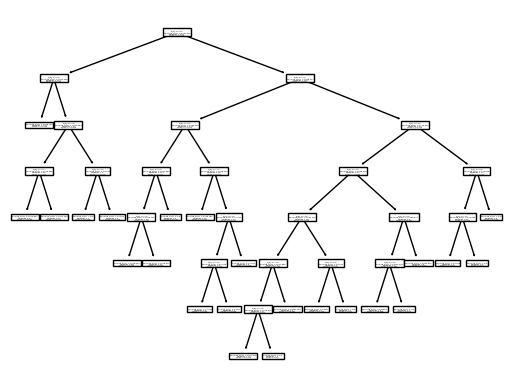

In [145]:
plot_tree(tree_dt)

#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [72]:
# Evaluar mmodelo
predicciones = tree_dt.predict(X_test)

In [74]:
predicciones

array([ 42.37996076,  22.07451743, 186.375     ,  22.07451743,
        22.07451743,  42.37996076,  22.07451743,  42.37996076,
        22.07451743,  22.07451743,  22.07451743,  22.07451743,
        22.07451743,  22.07451743,  42.37996076,  42.37996076,
        22.07451743,  22.07451743,  22.07451743,  22.07451743,
        82.17756923,  42.37996076,  82.17756923,  42.5928    ,
        22.07451743,  22.07451743,  32.84011395,  32.84011395,
        22.07451743,  22.07451743,  22.07451743,  42.37996076,
        22.07451743,  82.17756923,  22.07451743,  22.07451743,
        22.07451743,  22.07451743,  22.07451743,  22.07451743,
        22.07451743,  22.07451743,  32.84011395,  22.07451743,
        42.37996076,  22.07451743,  42.37996076,  42.37996076,
        22.07451743,  22.07451743,  22.07451743,  71.55486667,
        42.37996076,  49.86720435,  27.40208333,  22.07451743,
        42.37996076,  22.07451743,  22.07451743,  22.07451743,
        22.07451743,  36.66964286,  22.07451743,  22.07

In [76]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,22.074517,24.588360,27.402083,27.900000,28.687500,31.064575,31.275000,32.840114,36.669643,42.379961,42.592800,46.900000,49.867204,71.554867,82.177569,186.375000
Actual,,,,,,,,,,,,,,,,
0.0000,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0125,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6.2375,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6.4375,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6.7500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153.4625,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
164.8667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
227.5250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [87]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Pclass', ylabel='SibSp'>

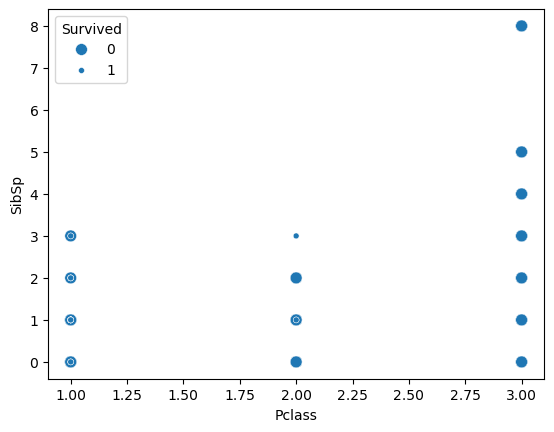

In [93]:
sns.scatterplot(x = "Pclass", y = "SibSp", size = "Survived", data = data)

<Axes: xlabel='Age', ylabel='Parch'>

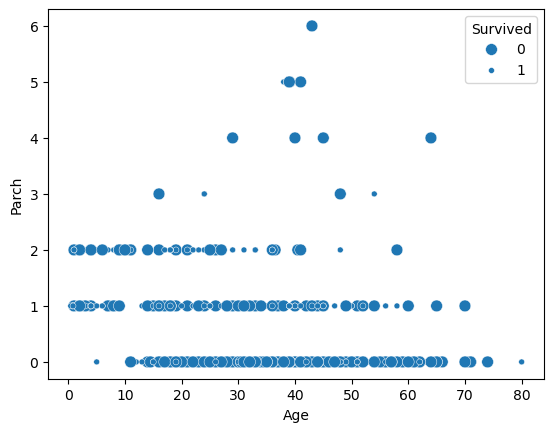

In [97]:
sns.scatterplot(x = "Age", y = "Parch", size = "Survived", data = data)

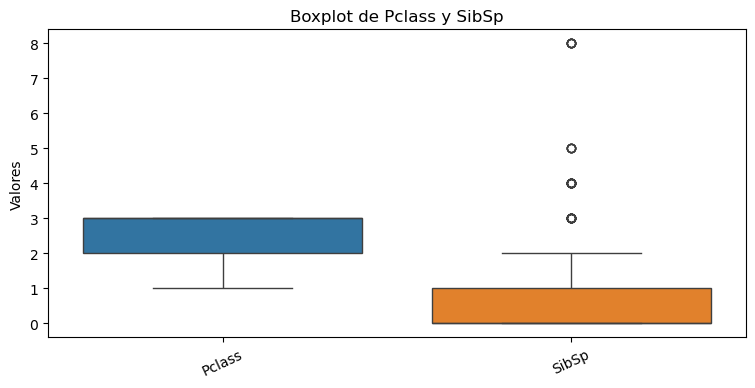

In [99]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=data[["Pclass", "SibSp"]])
plt.xticks(rotation=25)
plt.title('Boxplot de Pclass y SibSp')
plt.ylabel('Valores')
plt.show()

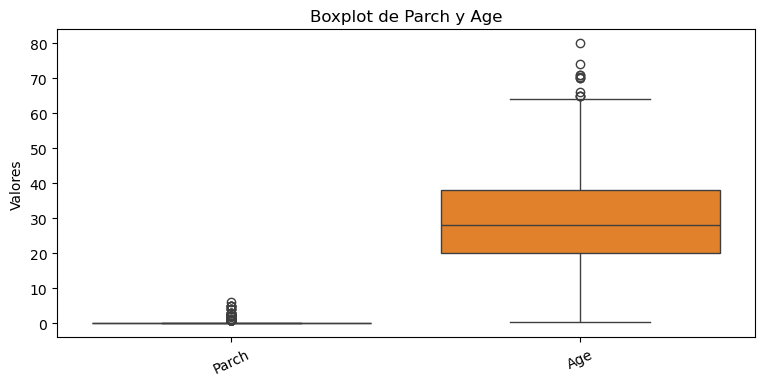

In [103]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=data[["Parch", "Age"]])
plt.xticks(rotation=25)
plt.title('Boxplot de Parch y Age')
plt.ylabel('Valores')
plt.show()

#### 8. Interpretar, analizar y documentar los resultados obtenidos

#### Cargar en GitHub el código del modelo diseñado 
#### https://github.com/ 